✅ 项目根目录：C:\Users\86136\Desktop\stock_prediction_lstm
✅ config.py是否存在：True
✅ src/data_generator.py是否存在：True

🔄 开始生成模拟股票数据...
🔄 开始添加技术指标...
实际数据列名： ['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume', 'MA7', 'MA30', 'RSI', 'MACD', 'Signal_Line', 'Middle_Band', 'Upper_Band', 'Lower_Band']
✅ 数据已保存到: data/stock_data.csv
📊 数据形状: (2162, 15)
📅 日期范围: 2020-01-01 00:00:00 到 2025-12-01 00:00:00
✅ 数据已保存到：data/stock_data.csv
✅ 数据形状：(2162, 15)
✅ 日期范围：2020-01-01 00:00:00 到 2025-12-01 00:00:00

🔄 开始生成可视化图表...


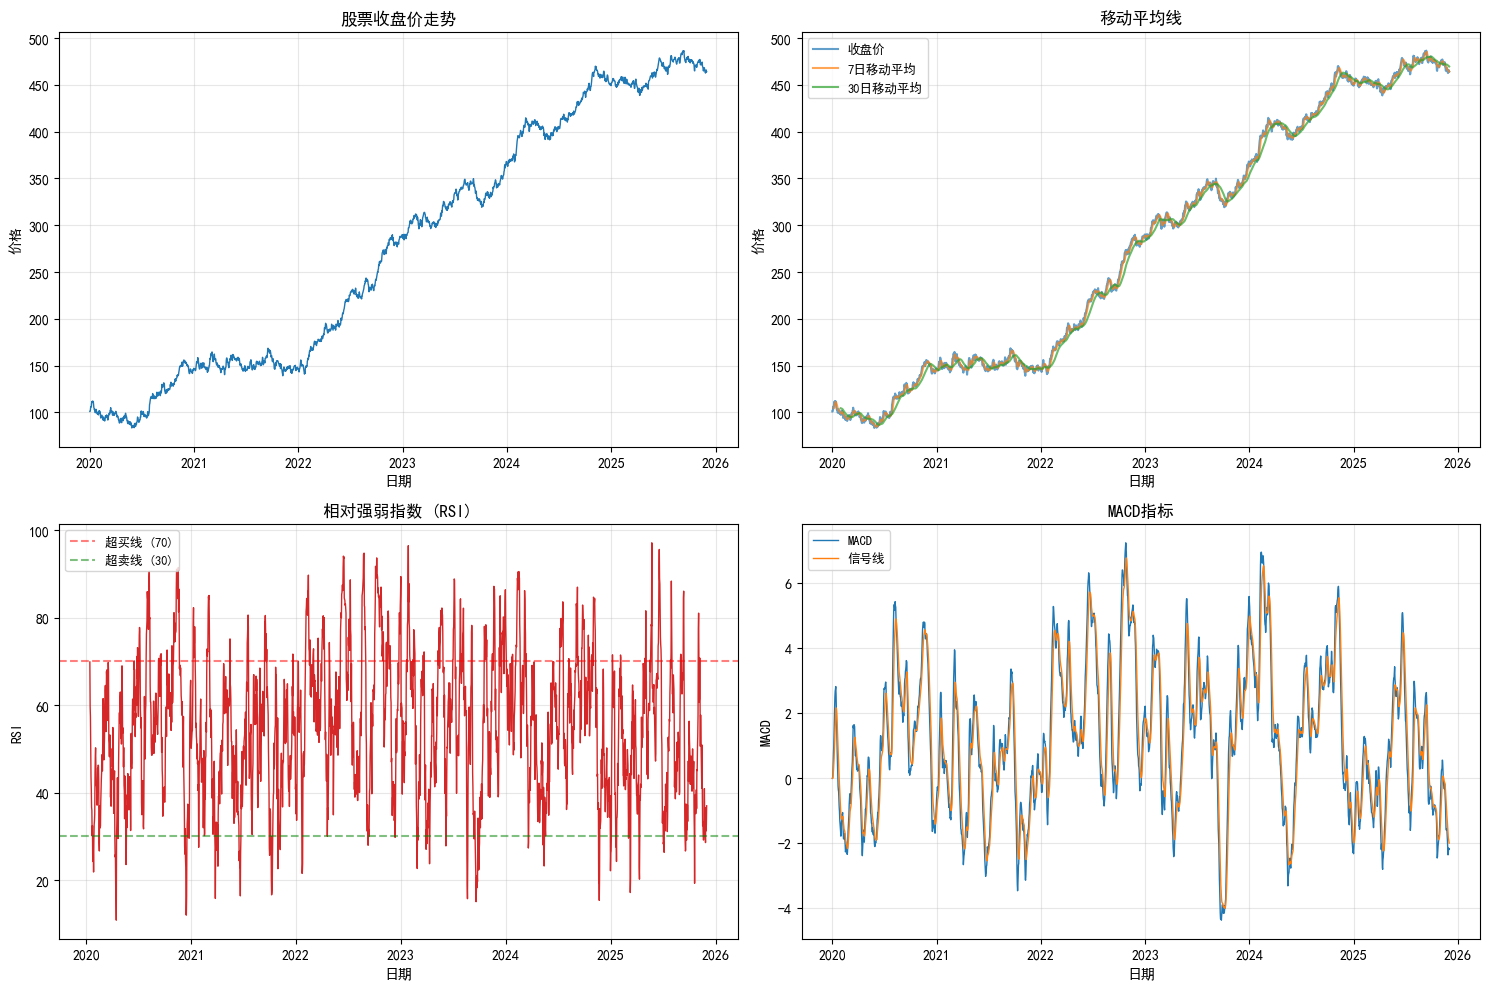


📈 模拟股票数据统计信息:
              Open         High          Low        Close        Volume
count  2162.000000  2162.000000  2162.000000  2162.000000  2.162000e+03
mean    278.147191   283.791434   272.586066   278.237516  5.612595e+06
std     132.482747   135.214755   129.857745   132.579239  2.599396e+06
min      83.124588    85.566490    81.216673    83.364087  1.014859e+06
25%     150.101869   153.157550   146.849503   149.809762  3.410629e+06
50%     287.063358   291.531602   280.131245   285.844256  5.695740e+06
75%     408.378078   416.080204   400.823611   408.329381  7.842914e+06
max     490.646662   499.549788   477.020976   486.565853  1.027187e+07

📅 总交易日数: 2162

✅ 数据生成&可视化流程完成！


In [2]:
# notebooks/01_data_exploration.ipynb
import sys
import os

# ========== 修复路径配置（关键：确保能找到项目根目录的模块） ==========
# 获取当前notebooks文件夹的绝对路径
notebooks_dir = os.getcwd()
# 获取项目根目录（notebooks的上级目录）
project_root = os.path.dirname(notebooks_dir)
# 将项目根目录加入Python模块搜索路径
sys.path.append(project_root)

# 验证路径配置是否正确
print(f"✅ 项目根目录：{project_root}")
print(f"✅ config.py是否存在：{os.path.exists(os.path.join(project_root, 'config.py'))}")
print(f"✅ src/data_generator.py是否存在：{os.path.exists(os.path.join(project_root, 'src', 'data_generator.py'))}")


# ========== 导入项目模块和依赖库 ==========
from config import Config
from src.data_generator import StockDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# ========== 解决matplotlib中文显示乱码问题 ==========
plt.rcParams['font.sans-serif'] = ['SimHei']  # 适配Windows系统中文（黑体）
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方块的问题


# ========== 初始化数据生成器 ==========
generator = StockDataGenerator(
    initial_price=Config.INITIAL_PRICE,
    trend_slope=Config.TREND_SLOPE,
    volatility=Config.VOLATILITY
)


# ========== 生成模拟股票数据 ==========
print("\n🔄 开始生成模拟股票数据...")
stock_data = generator.generate_stock_data(
    start_date=Config.START_DATE,
    end_date=Config.END_DATE,
    symbol=Config.STOCK_SYMBOL
)


# ========== 为数据添加技术指标（MA7/RSI/MACD等） ==========
print("🔄 开始添加技术指标...")
stock_data_with_indicators = generator.add_technical_indicators(stock_data)

# 打印实际列名（验证指标是否生成）
print("实际数据列名：", stock_data_with_indicators.columns.tolist())


# ========== 保存数据到本地CSV文件 ==========
# 确保data目录存在（避免保存失败）
os.makedirs(os.path.dirname(Config.DATA_PATH), exist_ok=True)
generator.save_to_csv(stock_data_with_indicators, Config.DATA_PATH)
print(f"✅ 数据已保存到：{Config.DATA_PATH}")
print(f"✅ 数据形状：{stock_data_with_indicators.shape}")
print(f"✅ 日期范围：{stock_data_with_indicators['Date'].min()} 到 {stock_data_with_indicators['Date'].max()}")


# ========== 可视化股票数据和技术指标（使用带指标的stock_data_with_indicators） ==========
print("\n🔄 开始生成可视化图表...")
# 确保static/images目录存在（避免保存图片失败）
plot_save_path = os.path.join(project_root, "static", "images")
os.makedirs(plot_save_path, exist_ok=True)

# 创建2行2列的子图布局
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. 子图1：股票收盘价走势
axes[0, 0].plot(stock_data_with_indicators['Date'], stock_data_with_indicators['Close'], linewidth=1, color='#1f77b4')
axes[0, 0].set_title('股票收盘价走势', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('日期', fontsize=10)
axes[0, 0].set_ylabel('价格', fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# 2. 子图2：移动平均线（7日/30日）
axes[0, 1].plot(stock_data_with_indicators['Date'], stock_data_with_indicators['Close'], label='收盘价', alpha=0.7, color='#1f77b4')
axes[0, 1].plot(stock_data_with_indicators['Date'], stock_data_with_indicators['MA7'], label='7日移动平均', alpha=0.7, color='#ff7f0e')
axes[0, 1].plot(stock_data_with_indicators['Date'], stock_data_with_indicators['MA30'], label='30日移动平均', alpha=0.7, color='#2ca02c')
axes[0, 1].set_title('移动平均线', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('日期', fontsize=10)
axes[0, 1].set_ylabel('价格', fontsize=10)
axes[0, 1].legend(loc='upper left', fontsize=9)
axes[0, 1].grid(True, alpha=0.3)

# 3. 子图3：相对强弱指数（RSI）
axes[1, 0].plot(stock_data_with_indicators['Date'], stock_data_with_indicators['RSI'], linewidth=1, color='#d62728')
axes[1, 0].axhline(y=70, color='r', linestyle='--', alpha=0.5, label='超买线 (70)')
axes[1, 0].axhline(y=30, color='g', linestyle='--', alpha=0.5, label='超卖线 (30)')
axes[1, 0].set_title('相对强弱指数 (RSI)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('日期', fontsize=10)
axes[1, 0].set_ylabel('RSI', fontsize=10)
axes[1, 0].legend(loc='upper left', fontsize=9)
axes[1, 0].grid(True, alpha=0.3)

# 4. 子图4：MACD指标
axes[1, 1].plot(stock_data_with_indicators['Date'], stock_data_with_indicators['MACD'], label='MACD', linewidth=1, color='#1f77b4')
axes[1, 1].plot(stock_data_with_indicators['Date'], stock_data_with_indicators['Signal_Line'], label='信号线', linewidth=1, color='#ff7f0e')
axes[1, 1].set_title('MACD指标', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('日期', fontsize=10)
axes[1, 1].set_ylabel('MACD', fontsize=10)
axes[1, 1].legend(loc='upper left', fontsize=9)
axes[1, 1].grid(True, alpha=0.3)

# 调整子图间距，避免重叠
plt.tight_layout()
# 保存图表到static/images目录
plt.savefig(os.path.join(plot_save_path, "data_exploration.png"), dpi=300, bbox_inches='tight')
# 显示图表
plt.show()


# ========== 输出数据统计信息 ==========
print("\n📈 模拟股票数据统计信息:")
print(stock_data_with_indicators[['Open', 'High', 'Low', 'Close', 'Volume']].describe())
print(f"\n📅 总交易日数: {len(stock_data_with_indicators)}")
print(f"\n✅ 数据生成&可视化流程完成！")